In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [12]:
data = pd.read_csv('Social_Network_Ads.csv')
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [13]:
# let's extract the relevant rows as inputs and outputs
X = data.iloc[:, 2:4].values
y = data.iloc[:, -1].values

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [37]:
#we need to scale both values to feel effect of each value
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [38]:
X_train = scaler.fit_transform(X_train)

In [39]:
X_test = scaler.transform(X_test)

In [40]:
from sklearn.neighbors import KNeighborsClassifier
# np.sqrt(X_train.shape[0])   op - 17.88
knn = KNeighborsClassifier(n_neighbors = 17)

In [41]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=17)

In [42]:
y_pred = knn.predict(X_test)

In [43]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred, y_test)

0.9625

In [44]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_pred, y_test)

array([[56,  1],
       [ 2, 21]])

In [45]:
accuracy = []
for i in range(1, 26):
  knn= KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train, y_train)
  pred = knn.predict(X_test)
  acc = accuracy_score(pred, y_test)
  accuracy.append(acc)

In [46]:
accuracy

[0.9,
 0.9125,
 0.9375,
 0.925,
 0.9625,
 0.9375,
 0.95,
 0.975,
 0.9625,
 0.95,
 0.95,
 0.95,
 0.95,
 0.95,
 0.95,
 0.95,
 0.9625,
 0.9625,
 0.9625,
 0.95,
 0.975,
 0.9625,
 0.975,
 0.95,
 0.9625]

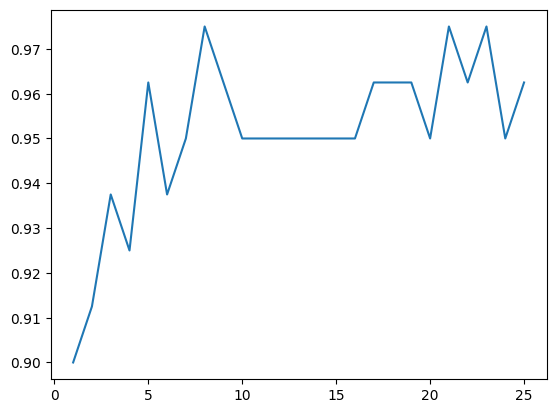

In [47]:
plt.plot(range(1, 26), accuracy)

In [48]:
# we get the highest accuracy for k = 8
knn = KNeighborsClassifier(n_neighbors = 8)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)
accuracy_score(pred, y_test)

0.975

also for some reason giving a value to random_state while making the train - test split, decreases the accuracy to around 86 percent from 96 percent obtained when random_state isn't given a value;